# Recurrent Neural Networks

Grzegorz Statkiewicz, Mateusz Matukiewicz

## Overview

The structure of the direcotry should be as follows:

```
.
├── data
│   ├── train.pkl
│   └── test_no_target.pkl
└── main.ipynb
```



## Setup

Select the device to use

In [2]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


## Data preparation

Load the data

In [3]:
train_path = "data/train.pkl"

In [4]:
import pickle

with open(train_path, "rb") as f:
    train_data = pickle.load(f)

print(f"Loaded {len(train_data)} training samples.")

Loaded 2939 training samples.


Determine the label values

In [14]:
compositors = {0: 'bach', 1: 'beethoven', 2: 'debussy', 3: 'scarlatti', 4: 'victoria'}

Print sample data

In [5]:
import random


idx = random.randint(0, len(train_data) - 1)
print(f"Sample data: {train_data[idx]}")

Sample data: (array([65., 65., 42., ..., 77.,  8.,  8.], shape=(1260,)), 1)


In [6]:
import numpy as np

sequences = [torch.tensor(seq, dtype=torch.long) for (seq, label) in train_data]
labels = [label for (seq, label) in train_data]

# Find the max chord index (vocab size, since chords are ints)
all_chords = set()
for seq in sequences:
    all_chords.update(seq.tolist())
vocab_size = int(max(all_chords)) + 2  # +1 for max, +1 for padding idx=0

print(f"Vocab size: {vocab_size}")

Vocab size: 193


Plot example composition

In [26]:
import matplotlib.pyplot as plt

def plot_sequence(seq: list[int], label: int):
    time_per_line = 200
    n_lines = int(np.ceil(len(seq) / time_per_line))

    fig, axes = plt.subplots(n_lines, 1, figsize=(30, 4 * n_lines), sharey=True)

    for i in range(n_lines):
        start = i * time_per_line
        end   = min((i + 1) * time_per_line, len(seq))
        chunk = seq.numpy()[start:end]
        
        ax = axes[i] if n_lines > 1 else axes
        ax.plot(chunk, marker='o', linestyle='--')
        
        ax.set_xlim(0, time_per_line)
        ax.set_ylim(0, vocab_size)
        ax.set_xticks(np.arange(0, time_per_line, 10))
        if i == 0:
            ax.set_title(f'Example Composition ({compositors[label]})')
        ax.set_ylabel('Chord Index')
        ax.set_xlabel('Time Step')

    plt.tight_layout()
    plt.show()

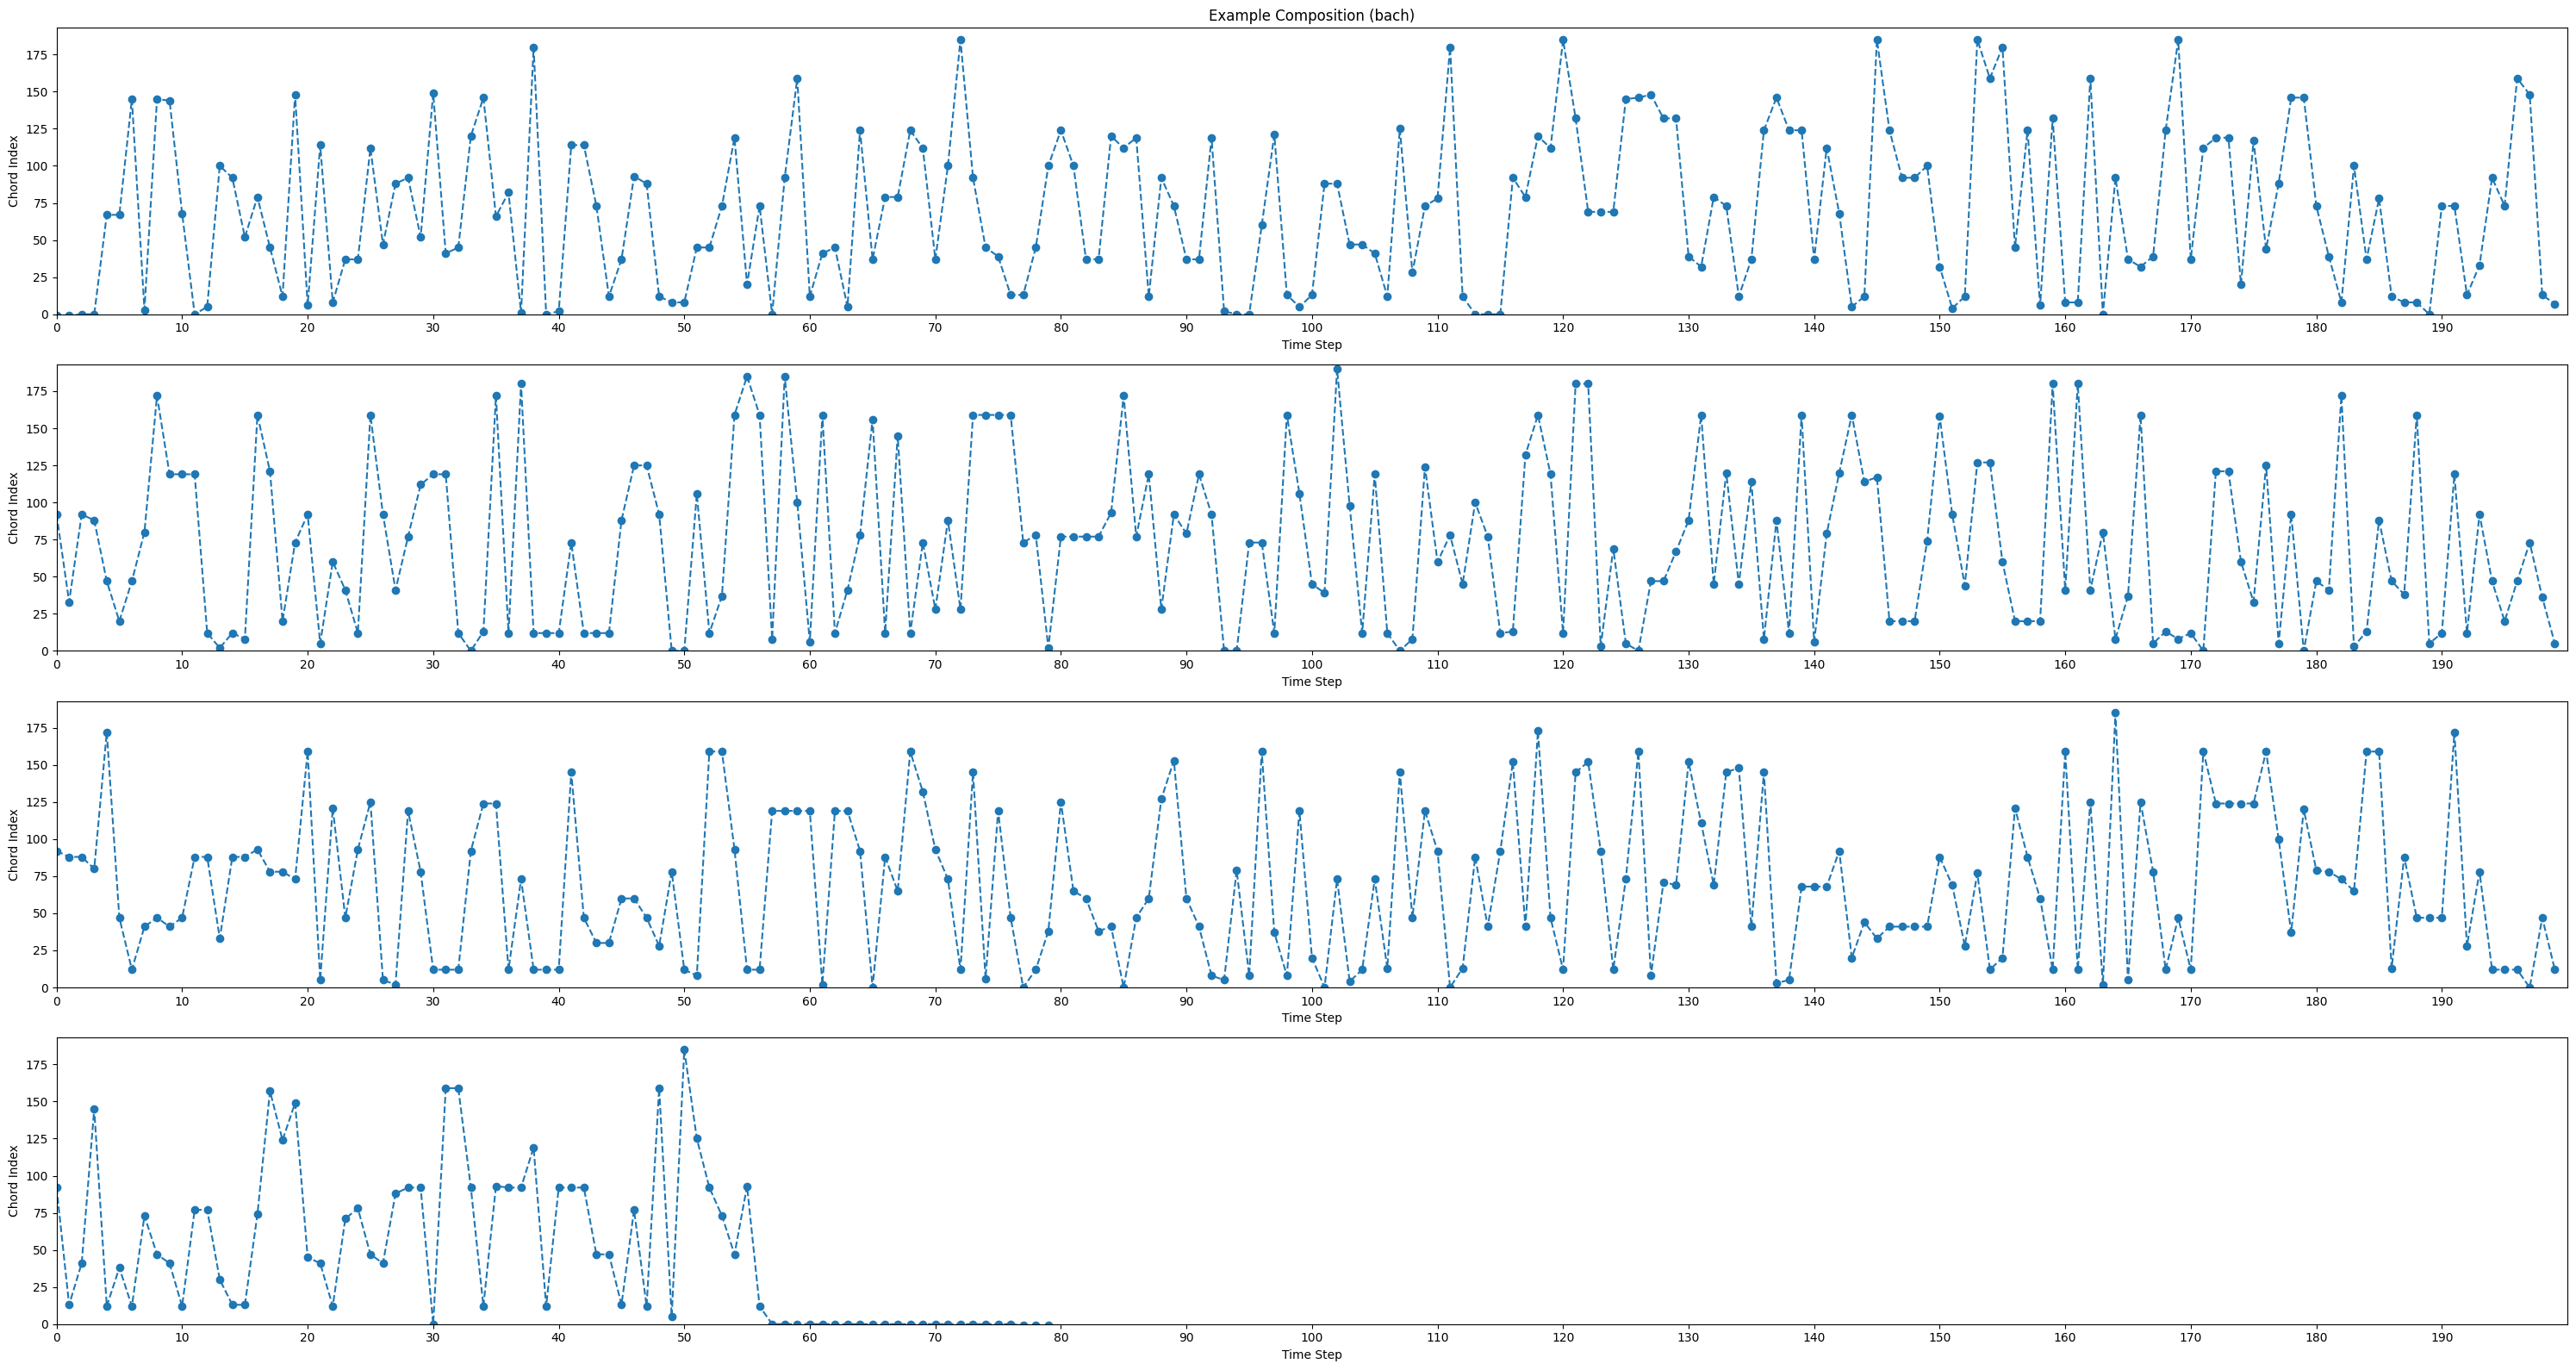

In [39]:
sample_idx = random.randint(0, len(sequences) - 1)

sample_seq = sequences[sample_idx]
sample_label = labels[sample_idx]

plot_sequence(sample_seq, sample_label)

Plot the class distribution

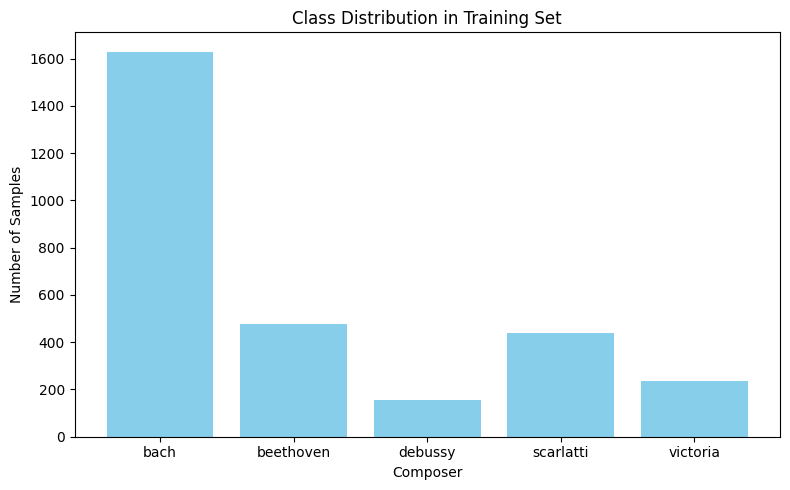

In [29]:
counts = np.bincount(labels, minlength=len(compositors))
class_names = [compositors[i] for i in range(len(counts))]

plt.figure(figsize=(8, 5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel("Composer")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.tight_layout()
plt.show()

Plot the length distribution per class

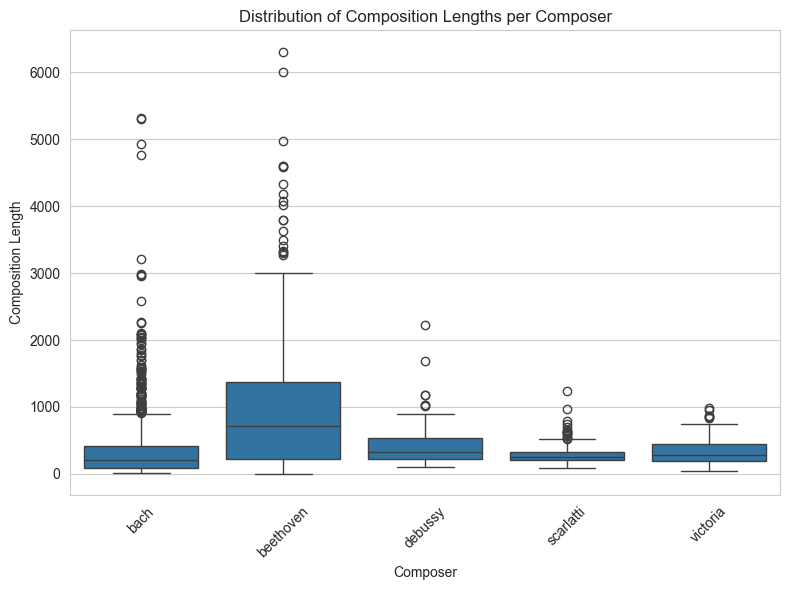

In [52]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=[compositors[l] for l in labels], y=lengths)
plt.xlabel("Composer")
plt.ylabel("Composition Length")
plt.title("Distribution of Composition Lengths per Composer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()